<a href="https://colab.research.google.com/github/hamza3laa/-Hierarchical-Clustering-/blob/main/clustering_case_study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import scipy.cluster.hierarchy as sch

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
url = '/content/drive/MyDrive/Machine learning/Mostfa othman course/Clustering materials /mall-customers.csv'
df = pd.read_csv(url , sep = ',')

In [25]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


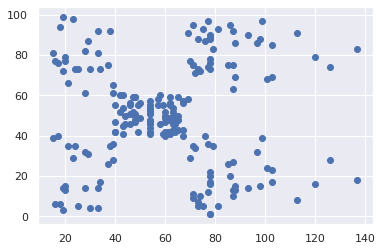

In [27]:
plt.scatter(df['Annual Income (k$)'] , df['Spending Score (1-100)']);

# **1- KMeans**

In [7]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,11):
  model = KMeans(n_clusters=i ,random_state=42)
  predections = model.fit_predict(df[['Age','Annual Income (k$)',	'Spending Score (1-100)']])
  wss.append(model.inertia_)


In [8]:
model.cluster_centers_

array([[ 41.        , 109.7       ,  22.        ],
       [ 25.52173913,  26.30434783,  78.56521739],
       [ 32.78571429,  78.03571429,  81.89285714],
       [ 36.30769231,  31.69230769,  36.46153846],
       [ 32.45454545, 108.18181818,  82.72727273],
       [ 24.07142857,  58.07142857,  49.71428571],
       [ 46.16      ,  61.32      ,  46.36      ],
       [ 61.44444444,  51.18518519,  50.44444444],
       [ 41.        ,  80.18181818,  12.68181818],
       [ 49.        ,  24.46153846,  11.07692308]])

In [9]:
wss

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51084.50595493436,
 44307.87341670445,
 40573.697664978696,
 37085.62797727232]

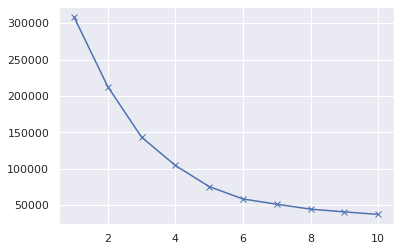

In [10]:
plt.plot( range(1,11) , wss ,'bx-');

# still can not detrmine number of clusters as 5 & 6 clusters are pretty close

Finding the Optimal Number of Clusters using silhouette coefficient

In [11]:
X=df[['Annual Income (k$)','Spending Score (1-100)']].values


In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,11):
  model = KMeans(n_clusters=i ,random_state=42)
  model.fit(X)
  silhouette_avg.append(silhouette_score(X, model.labels_))
  


In [13]:

silhouette_avg

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5288104473798049,
 0.45924987052000815,
 0.4565077334305076,
 0.45056557470336733]

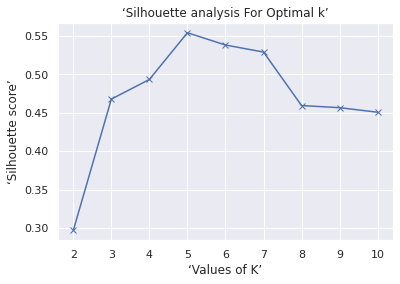

In [14]:
plt.plot(range(2,11),silhouette_avg ,'bx-')
plt.xlabel('‘Values of K’')
plt.ylabel('‘Silhouette score’') 
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

## Now we can assure the optimum number of clusters is 5

## Let's run the model with 5 clusters 

In [15]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=5)
predections=model.fit_predict(df[[ 'Annual Income (k$)',	'Spending Score (1-100)']])
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

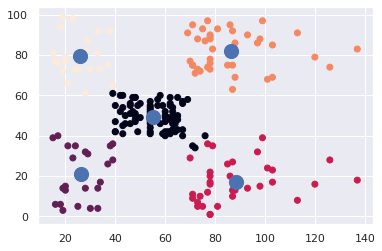

In [16]:
plt.scatter(df['Annual Income (k$)'] , df['Spending Score (1-100)'] ,c=model.labels_ );
plt.scatter(model.cluster_centers_[: ,0], model.cluster_centers_[: ,-1] , c='b' , s=200);

In [17]:
y_clustred = model.labels_
df['KMClusters']= y_clustred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMClusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


# **Hierarchical Clustering**

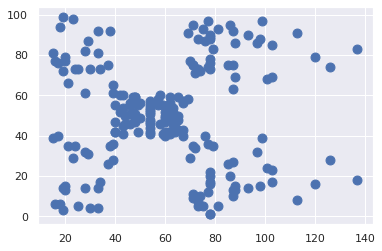

In [18]:
plt.scatter(df.iloc[: , 3] , df.iloc[: ,4] , s = 80)


In [19]:
X = df.iloc[:, [3,4]].values


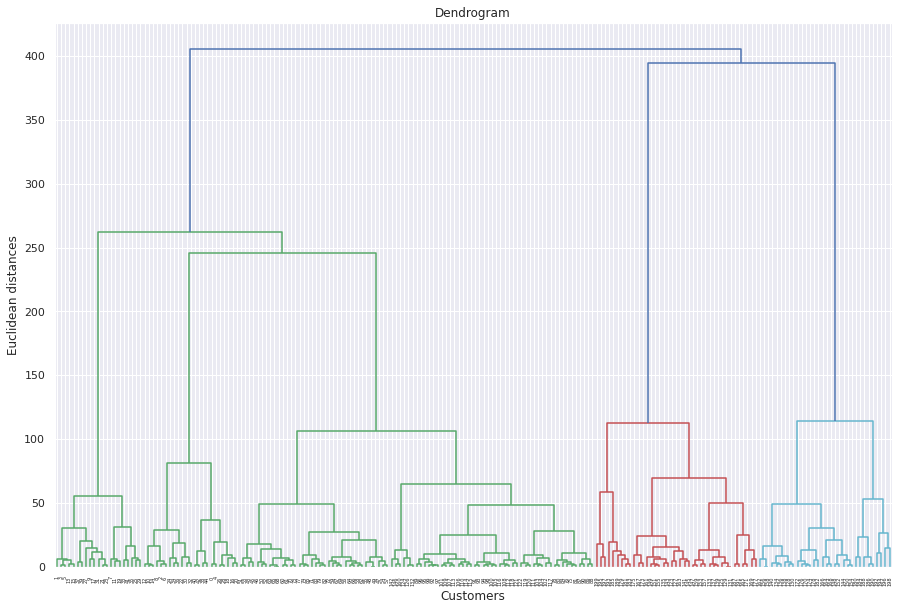

In [30]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X , method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Customers are represented on the x-axis, and the Euclidean distance between clusters is represented on the y-axis. How do we figure out the best number of clusters based on this diagram? We want to find the longest vertical distance we can without crossing any horizontal lines, which is the red-framed line in the diagram above. Let’s count the lines on the diagram and figure out how many clusters are best. For this dataset, the cluster number will be 5.

In [21]:
#Fitting hierarchical clustering to the Mall_Customes dataset 
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
hc.fit_predict(X)


In [31]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

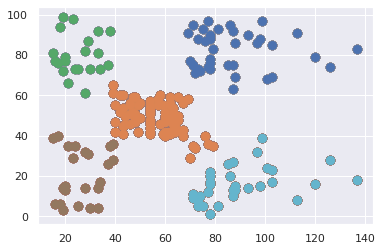

In [81]:
plt.scatter(X[: , 0] , X[: ,1 ])
for i in hc.labels_:
  plt.scatter(X[hc.labels_ == i , 0],X[hc.labels_==i ,1] ,s=70 ,label=i)



In [77]:
df['HiercClustrs'] = hc.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),HiercClustrs
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


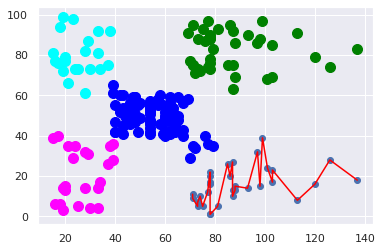

In [74]:
plt.scatter(df['Annual Income (k$)'] , df['Spending Score (1-100)']);
plt.plot(X[y_hc==0, 0], X[y_hc==0, 1], c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')